# CH05-210103 Introduction to Earth System Data

Data inspection, visualisation and analysis can be scaled up to very complex and time-consuming tasks

Some useful resources are included in the last part of the [resources](https://github.com/aprossi/CH05-210103-IntroEarthData-students/blob/master/resources.md) file.

In particular, [Awesome Open Geoscience](https://github.com/softwareunderground/awesome-open-geoscience#how-to-contribute) is very valuable, e.g.


- [Basic Geoscience Cheat Sheet](https://static.squarespace.com/static/549dcda5e4b0a47d0ae1db1e/54a06d6ee4b0d158ed95f696/54a06d6fe4b0d158ed95fff0/1295033898443/Cheatsheet_basic.pdf) – Cheat Sheet for Basic Geoscience
- [Geophysics Cheat Sheet](https://static.squarespace.com/static/549dcda5e4b0a47d0ae1db1e/54a06d6ee4b0d158ed95f696/54a06d70e4b0d158ed9603f5/1350658645407/Cheatsheet_geophysics.pdf) – Cheat Sheet for Geophysics
- [Rock Physics Cheat Sheet](https://static.squarespace.com/static/549dcda5e4b0a47d0ae1db1e/54a06d6ee4b0d158ed95f696/54a06d6fe4b0d158ed960042/1374593568367/Cheatsheet_Rock_Physics.pdf) –  Cheat Sheet for Rock Physics
- [Petroleum Science Cheat Sheet](https://static.squarespace.com/static/549dcda5e4b0a47d0ae1db1e/54a06d6ee4b0d158ed95f696/54a06d6fe4b0d158ed96019e/1323808738753/Cheatsheet_petroleum.pdf) – Cheat Sheet for Petroleum Science

# 2D gridding & imagery

## 2-D Interpolation

In [1]:
# see https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

### Load data (from class 03)

In [2]:
# load from csv via pandas
import pandas as pd
import numpy as np


df = pd.read_csv('../data_samples/xyz/points3d.csv')
# plot the xy point location
from matplotlib import pyplot as plt

df.plot(x='eastings', y='northings', marker='.')
plt.show()

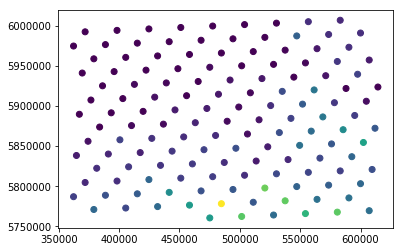

In [3]:
# this time we also condider "z"
x,y,z = [],[],[]

x.append (df.eastings)
y.append (df.northings)
z.append (df.topo)
fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.plot(y,x,'.')
#ax.plot(y,x,'.')
plt.scatter(x,y,c=z)
plt.show()





# print(df.topo)

In [4]:
np.asarray(z)

array([[ 13,  15,   0,   0,   0,   0,   0,   0,   0,  15,  15,  34,   0,
          0,   0,   0,   0,   0,   0,  15,   7,   1,   0,   0,   0,   0,
          0,   0,   8,  18,   2,   0,   0,   3,   0,   0,   0,   0,  22,
          6,   0,   7,   6,   0,   2,   3,   0,   0,   0,  43,  26,   2,
          7,   0,   5,   0,   0,   4,  18,  32,  15,   3,   9,   8,   0,
          0,   0,  20,  44,  22,   6,   3,  11,   3,   3,   0,  30,  53,
         39,  27,   4,  14,  14,  16,  22,   5,  64,  30,  41,   9,  27,
         22,  18,  10,  12,   9,  36,  24,  13,   8,  15,  19,  17,  18,
         15,  27,  21,  23,  25,  15,  20,  20,  36,  15,  13,  37,  33,
         35,  86,  30,  28,  54,  32,  28,  21,  41,  41,  84,  30, 111,
         60,  38,  24,  37,  40,  83,  72,  39,  82,  60]])

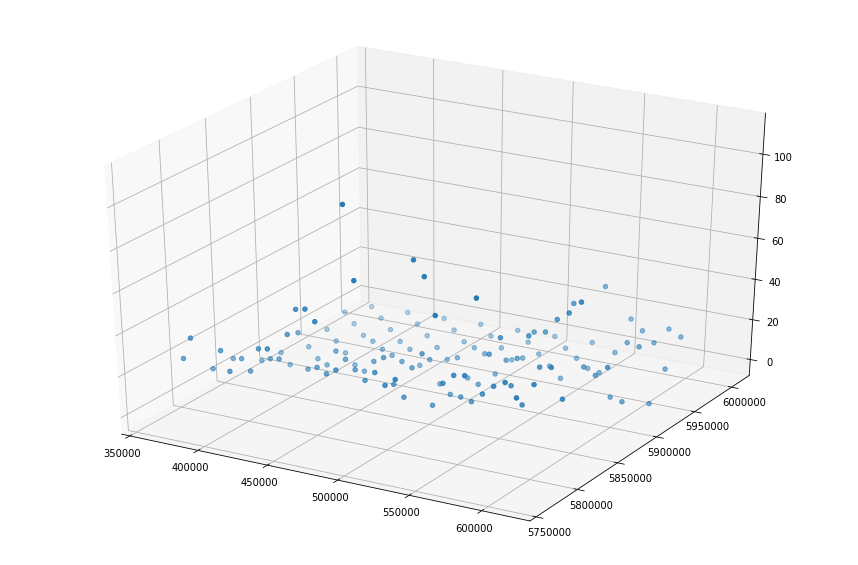

In [83]:
# Optional step - 3d visualization, requires older module six, to install with pip:
## pip install matplotlib --upgrade --ignore-installed six
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(np.asarray(x)[0],np.asarray(y)[0],np.asarray(z)[0])
#ax.plot_trisurf(np.asarray(x)[0],np.asarray(y)[0],np.asarray(z)[0], )
plt.show()


In [84]:
print(x[0][:5])
# df.eastings

0    583161.801871
1    556761.801871
2    530361.801871
3    503961.801871
4    477561.801871
Name: eastings, dtype: float64


5
5


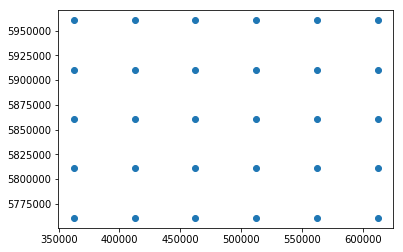

In [85]:
import numpy as np
from scipy.interpolate import griddata
from numpy import genfromtxt

my_data = genfromtxt('../data_samples/xyz/points3d.csv', delimiter=',')
x = my_data[1:, 0]
y = my_data[1:, 1]
z = my_data[1:, 2]

# target grid to interpolate to
xi = np.arange(df.eastings.min(),df.eastings.max(),50000)
yi = np.arange(df.northings.min(),df.northings.max(),50000)

xi,yi = np.meshgrid(xi,yi)

print(len(xi))
print(len(yi))

plt.scatter(xi, yi)
plt.show()

# interpolate
# zi = griddata((x,y),z,(xi,yi),method='linear')
zi = griddata((x,y),z,(xi,yi),method='nearest')

# see https://matplotlib.org/examples/pylab_examples/colorbar_tick_labelling_demo.html

In [86]:
points = df.topo
values = df.eastings, df.northings

10
10
10


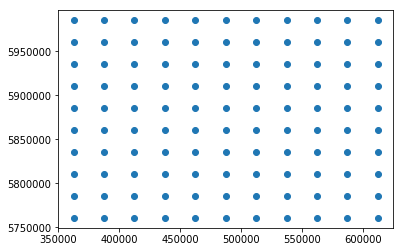

[[ 37.  37.  24.  38.  60.  60.  82.  39.  72.  83.  40.]
 [ 21.  28.  32.  54.  60. 111.  30.  84.  41.  41.  40.]
 [ 13.  15.  36.  36.  20.  20.  15.  25.  23.  21.  27.]
 [  9.  12.  10.  17.  19.  15.   8.  13.  24.  36.  27.]
 [  5.   0.  22.  16.  14.  14.   4.  27.  39.  53.  30.]
 [  0.   0.   3.   3.  11.   3.   6.  22.  44.  20.  30.]
 [  0.   0.   0.   5.   0.   7.   2.  26.  43.   0.   4.]
 [  0.   0.   3.   2.   0.   6.   7.   0.   6.  22.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   2.  18.   8.]
 [  0.   0.   0.   0.   0.   0.   0.  34.  15.  15.  15.]]


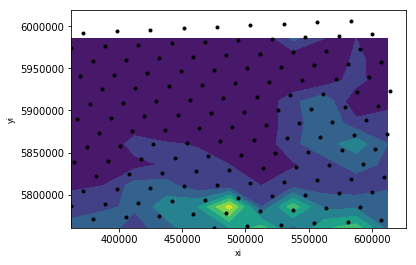

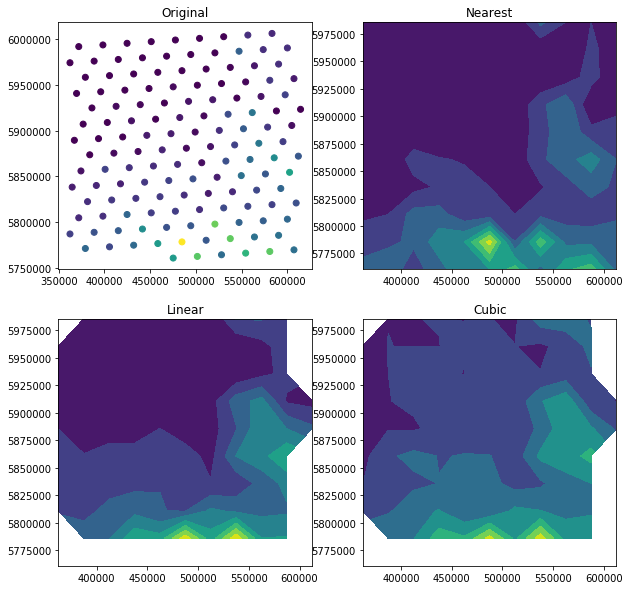

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values

# target grid to interpolate to
xi = np.arange(df.eastings.min(),df.eastings.max(),25000)
yi = np.arange(df.northings.min(),df.northings.max(),25000)

xi,yi = np.meshgrid(xi,yi)
zi = griddata((x,y),z,(xi,yi),method='nearest')
print(len(xi))
print(len(yi))
print(len(zi))

plt.scatter(xi, yi)
plt.show()

# interpolate
# zi = griddata((x,y),z,(xi,yi),method='linear')
grid_z_nearest = griddata((x,y),z,(xi,yi),method='nearest')
grid_z_linear = griddata((x,y),z,(xi,yi),method='linear')
grid_z_cubic = griddata((x,y),z,(xi,yi),method='cubic')

print(zi)


# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y,'k.')
plt.contourf(xi,yi,zi)

plt.xlabel('xi',fontsize=8)
plt.ylabel('yi',fontsize=8)


plt.show()

plt.subplot(221)
#plt.plot(x,y,'k.')
plt.scatter(x,y,c=z)
plt.title('Original')
plt.subplot(222)
plt.contourf(xi,yi,grid_z_nearest)
plt.title('Nearest')
plt.subplot(223)
plt.contourf(xi,yi,grid_z_linear)
plt.title('Linear')
plt.subplot(224)
plt.contourf(xi,yi,grid_z_cubic)
plt.title('Cubic')
plt.gcf().set_size_inches(10, 10)
plt.show()

# Tasks

## Task 6.1 - change the grid size

Please change in the code above the spacing of the grid (units are meters) using:

* 10 km
* 50 km

the code to be changed is the one below.

for help please use ```np.arange?```
```
xi = np.arange(df.eastings.min(),df.eastings.max(),25000)
yi = np.arange(df.northings.min(),df.northings.max(),25000)
```

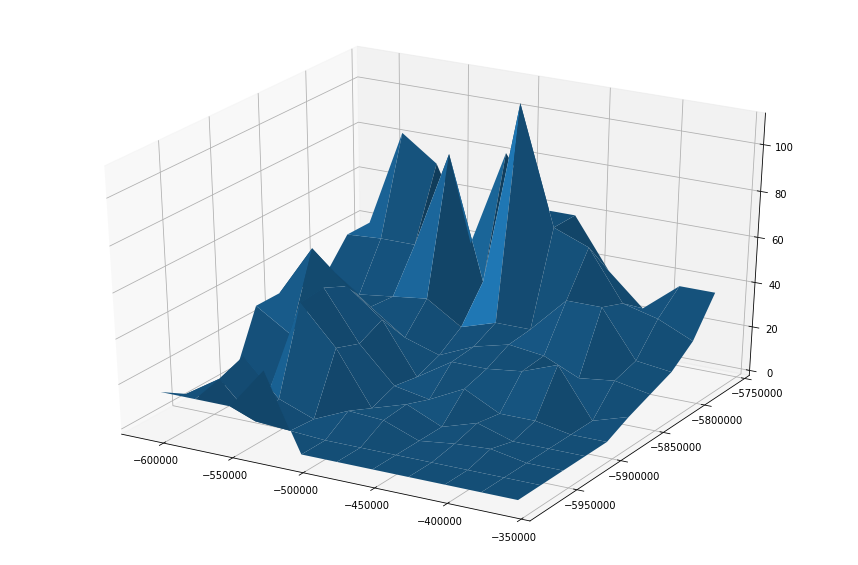

In [88]:
# Optional step - 3d visualization, requires older module 'six', to install with pip:
## pip install matplotlib --upgrade --ignore-installed six
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(-xi,-yi,grid_z_nearest)
plt.show()

In [89]:
# print(df.topo.max)
print("min of x is ",df.eastings.min())
print("max of x is ",df.eastings.max())
print("min of y is ",df.northings.min())
print("max of y is ",df.northings.max())

min of x is  362361.8018709604
max of x is  614361.8018709604
min of y is  5760572.378301968
max of y is  6006572.378301968


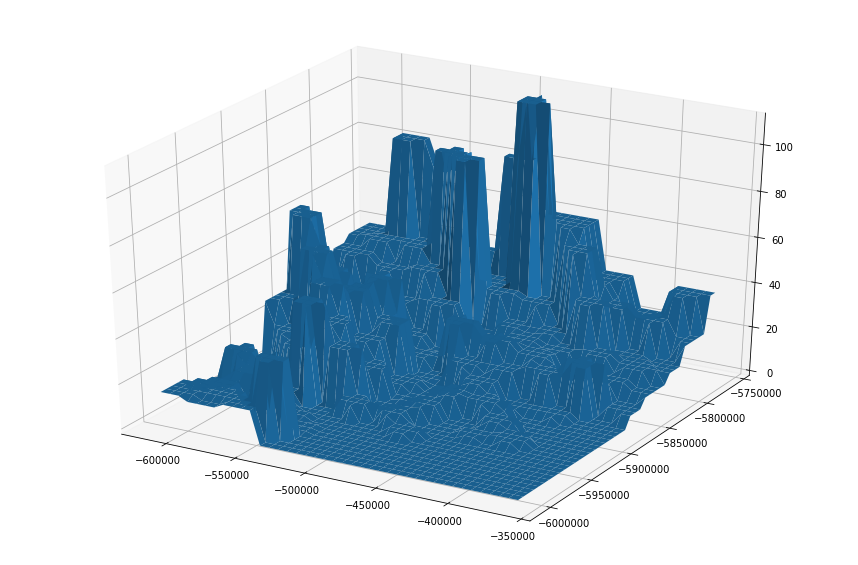

In [90]:
# Another way to interpolate
# see https://stackoverflow.com/questions/18496783/analogy-to-scipy-interpolate-griddata
grid_x, grid_y = np.mgrid[df.eastings.min():df.eastings.max():40j, df.northings.min():df.northings.max():40j]
#grid_y
grid_z_nearest_highres = griddata((x,y),z,(grid_x,grid_y),method='nearest')
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(-grid_x,-grid_y,grid_z_nearest_highres)
plt.show()

## Smoothing

In [91]:
# see https://wiki.seg.org/wiki/Smoothing_surfaces_and_attributes
# see also https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

In [92]:
#Brief intro to convolution kernels - low pass vs high pass

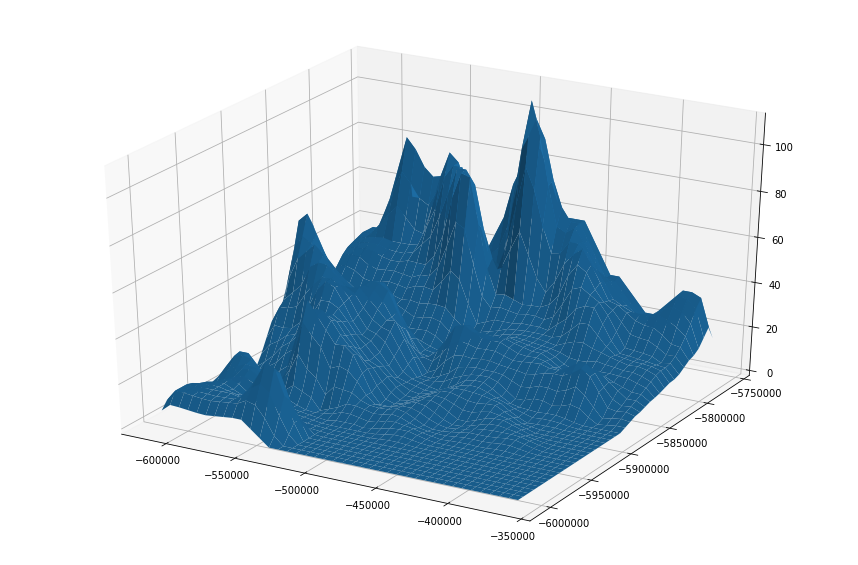

In [93]:
from scipy import signal
lowPassKernel=np.array([[1,1,1],[1,1,1],[1,1,1]])/9
#print(grid_z_nearest)
f = signal.convolve2d(grid_z_nearest_highres, lowPassKernel, mode='same', boundary='fill')
f[0]
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
#ax.plot_surface(-grid_x,-grid_y,grid_z_nearest_highres)
#print(f.shape)
#print(grid_z_nearest_highres.shape)
ax.plot_surface(-grid_x,-grid_y,f)
plt.show()
#np.convolve(grid_z_nearest,lowPassKernel)

## 2-D: Colormaps

Please see [https://github.com/mycarta/PerceptualColormaps](https://github.com/mycarta/PerceptualColormaps) for background and discussion.

and https://mycarta.wordpress.com/color-palettes/

and https://matplotlib.org/users/colormaps.html

and https://mycarta.wordpress.com/2012/10/06/the-rainbow-is-deadlong-live-the-rainbow-part-3/

* https://mycarta.wordpress.com/2014/04/25/convert-color-palettes-to-python-matplotlib-colormaps/
* http://nbviewer.jupyter.org/github/kwinkunks/notebooks/blob/master/Matteo_colourmaps.ipynb
* https://mycarta.wordpress.com/2012/12/06/the-rainbow-is-deadlong-live-the-rainbow-part-5-cie-lab-linear-l-rainbow/

### Load raster imagery (e.g. topography)

one can extract topography subsets from [https://maps.ngdc.noaa.gov/viewers/wcs-client/](https://maps.ngdc.noaa.gov/viewers/wcs-client/)

We load the topography of some bits of Europe as netCDF (gdal has some issues with our environment)

crs
lat
lon
Band1
[[-1.310e+02 -1.240e+02 -1.210e+02 ...  1.380e+02  1.380e+02  1.370e+02]
 [-1.370e+02 -1.260e+02 -1.230e+02 ...  1.330e+02  1.320e+02  1.390e+02]
 [-1.440e+02 -1.320e+02 -1.250e+02 ...  1.240e+02  1.280e+02  1.310e+02]
 ...
 [-1.084e+03 -1.093e+03 -1.106e+03 ... -3.000e+00 -4.000e+00 -7.000e+00]
 [-1.069e+03 -1.075e+03 -1.086e+03 ... -5.000e+00 -4.000e+00 -9.000e+00]
 [-1.060e+03 -1.063e+03 -1.070e+03 ... -4.000e+00 -2.000e+00 -1.000e+00]]


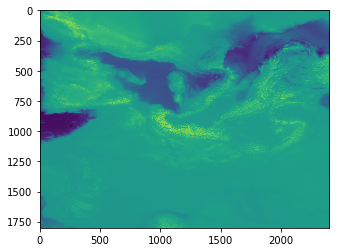

In [17]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4

# fname = 'http://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_onedeg/Best'  # Remote OPeNDAP Dataset 
filename = '../data_samples/geospatial-raster/etopo1.nc'   # Local NetCDF file

# f = netCDF4.Dataset(filename)

f = xr.open_dataset(filename)
# # dsloc = ds.sel(lon=230.5,lat=55.0,method='nearest')

for v in f.variables: print(v)
print(f.Band1.data)
# flipped = np.flipud(f.Band1.data)# it's flipped!
#plotting
plt.imshow(f.Band1.data)
plt.show()

it is flipped. one can fix it with the code below (numpy array start from lower left... raster geodata from upper right..)

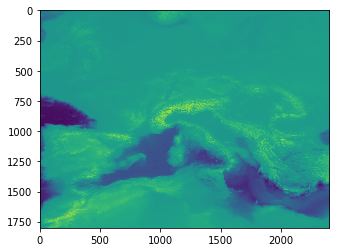

In [18]:
flipped = np.flipud(f.Band1.data)# it's flipped!
#plotting
plt.imshow(flipped)
plt.show()

### Plot a bit better

with x and y labels not in pixels, with color bar

figure out longitude and latitude..

In [19]:
f.Band1.lat

<xarray.DataArray 'lat' (lat: 1801)>
array([30.      , 30.016667, 30.033333, ..., 59.966667, 59.983333, 60.      ])
Coordinates:
  * lat      (lat) float64 30.0 30.02 30.03 30.05 30.07 30.08 30.1 30.12 ...
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

In [20]:

print("minumum latitude is: ", min(f.Band1.lat.values))

print("maximum latitude is: ", max(f.Band1.lat.values))

print("minumum longitude is: ", min(f.Band1.lon.values))

print("maximum longitude is: ", max(f.Band1.lon.values))

minlon = min(f.Band1.lon.values)
maxlon = max(f.Band1.lon.values)
minlat = min(f.Band1.lat.values)
maxlat = max(f.Band1.lat.values)

# please use those instead of the range below.... @ mikhail

minumum latitude is:  30.0
maximum latitude is:  60.0
minumum longitude is:  -10.0
maximum longitude is:  30.0


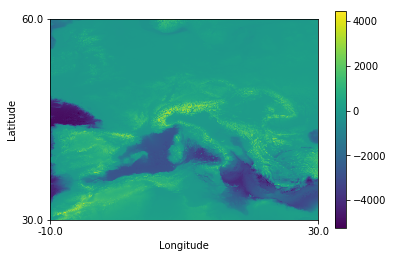

In [16]:
# plot with legend, x an y axis labels
fig, ax = plt.subplots()
#Ticks for y-axis (latitude)
ax.axes.yaxis.set_ticks([0,flipped.shape[0]])
ax.axes.yaxis.set_ticklabels([maxlat,minlat])
plt.ylabel('Latitude')
#Ticks for x-axis (latitude)
ax.axes.xaxis.set_ticks([0,flipped.shape[1]])
ax.axes.xaxis.set_ticklabels([minlon,maxlon])
plt.xlabel('Longitude')
plt.imshow(flipped)
plt.colorbar()

plt.show()

### Change the color bar

see links above on color, and please comment/uncomment the lines with ```cmap=<something>``` 


see also https://nbviewer.jupyter.org/github/jobar8/interpies/blob/master/notebooks/Displaying_grids.ipynb

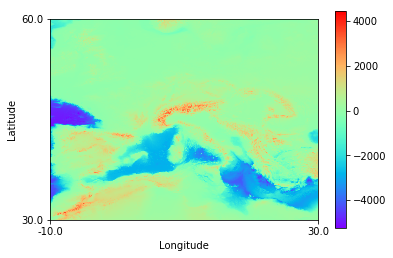

In [21]:
# plot with legend, x an y axis labels
fig, ax = plt.subplots()
plt.imshow(flipped, cmap='rainbow')
# plt.imshow(flipped, cmap='magma')
# plt.imshow(flipped, cmap='viridis') # the default one from above
plt.colorbar()
#Ticks for y-axis (latitude)
ax.axes.yaxis.set_ticks([0,flipped.shape[0]])
ax.axes.yaxis.set_ticklabels([maxlat,minlat])
plt.ylabel('Latitude')
#Ticks for x-axis (latitude)
ax.axes.xaxis.set_ticks([0,flipped.shape[1]])
ax.axes.xaxis.set_ticklabels([minlon,maxlon])
plt.xlabel('Longitude')
plt.show()

### Histogram of topography

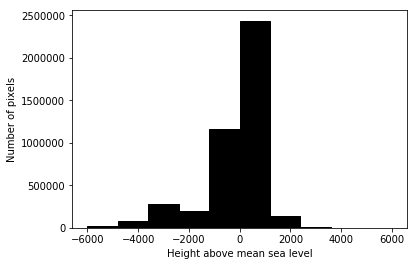

In [18]:
# histogramm of plot
plt.hist(flipped.ravel(), bins=10, range=(-6000, 6000), fc='k', ec='k')
plt.xlabel('Height above mean sea level')
plt.ylabel('Number of pixels')
plt.show()



# Tasks

## T6.2 change histogram bin

* please produce histograms of the above topography over Europe using different bins.
* Considering that the resolution of the topography is about 1.8 km, how much is the area of the imaged part of europe and africa between 0 and 1000 meters of altitude in square kilometers?

# 2-D: contours

In [189]:
# load needed stuff...
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm

[[-1.310e+02 -1.240e+02 -1.210e+02 ...  1.380e+02  1.380e+02  1.370e+02]
 [-1.370e+02 -1.260e+02 -1.230e+02 ...  1.330e+02  1.320e+02  1.390e+02]
 [-1.440e+02 -1.320e+02 -1.250e+02 ...  1.240e+02  1.280e+02  1.310e+02]
 ...
 [-1.084e+03 -1.093e+03 -1.106e+03 ... -3.000e+00 -4.000e+00 -7.000e+00]
 [-1.069e+03 -1.075e+03 -1.086e+03 ... -5.000e+00 -4.000e+00 -9.000e+00]
 [-1.060e+03 -1.063e+03 -1.070e+03 ... -4.000e+00 -2.000e+00 -1.000e+00]]


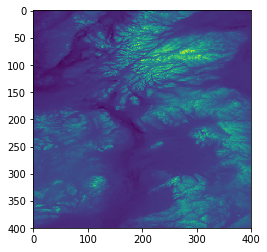

In [190]:
# %matplotlib inline

# # load raster with Pillow (gdal might have issues with all those dependencies and libraries installed..)
# from PIL import Image
filename = '../data_samples/geospatial-raster/etopo1.nc'
f = xr.open_dataset(filename)
#for v in f.variables: print(v)
print(f.Band1.data)
flipped = np.flipud(f.Band1.data)# it's flipped!
#subset
topoSubset=flipped[100:500,100:500]
plt.imshow(flipped[100:500,100:500])
plt.show()


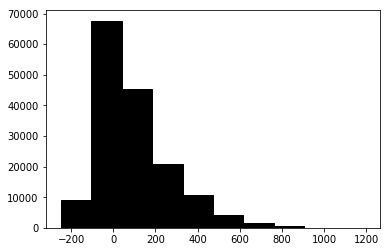

In [191]:
plt.hist(topoSubset.ravel(), bins=10, fc='k', ec='k')
plt.show()

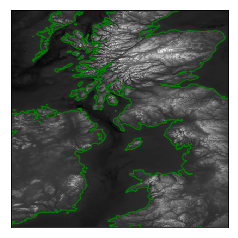

In [192]:
#http://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
#find all contours at zero
contours = measure.find_contours(topoSubset, 0)
#plot them all in green
fig, ax = plt.subplots()
ax.imshow(topoSubset, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color='green')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

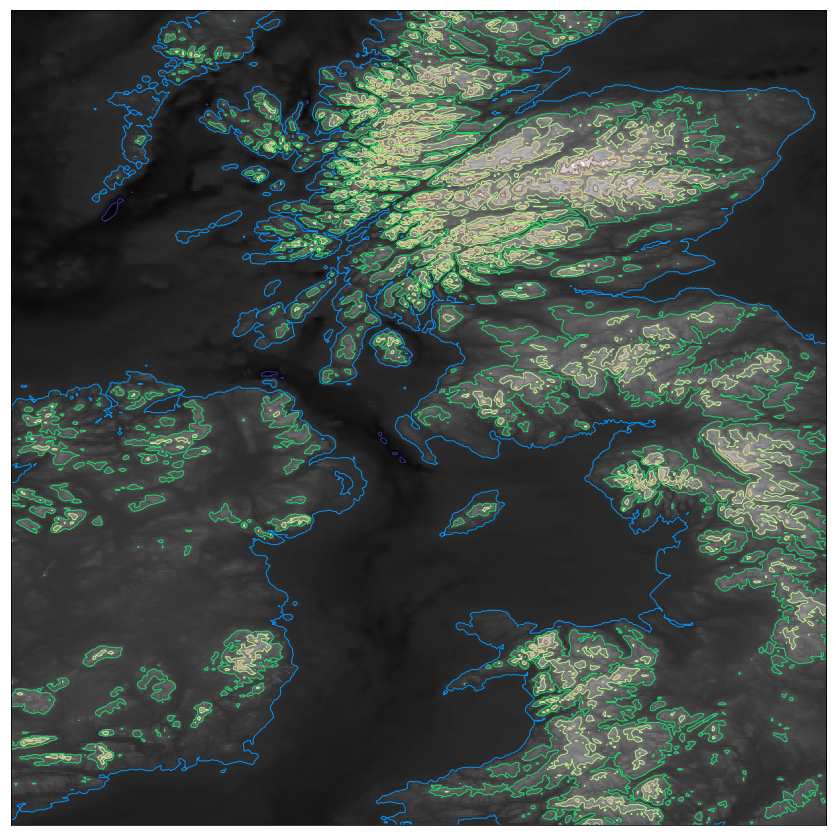

In [197]:
#Find countours and assign a value to them:
getContourSet = lambda topoSubset, elevation: [measure.find_contours(topoSubset, elevation), elevation]
#plot
#plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,15))
#fig.figure(figsize=(15,10))
ax.imshow(topoSubset, interpolation='nearest', cmap=plt.cm.gray)
for i in range(-200,1200,200):
    cmapIndex=int(((i+200.)/(1200+200))*255)
    for n, contour in enumerate(getContourSet(topoSubset,i)[0]):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color=plt.cm.terrain(cmapIndex))
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# Tasks

## T 6.3

* Please chooose another subset of europe and display using different colormaps
* Please display contours on individual maps at:
    * 100 m
    * 500 m
    * 1000 m

# Thin section / image analysis

Sources of think section images, e..g

* Virtual Microscope - [https://www.virtualmicroscope.org/collections](https://www.virtualmicroscope.org/collections)
* Sedimentary rocks
    * Carbonate rock think sections - [from SEPM](http://www.sepmstrata.org/page.aspx?&pageid=298&6)
    * Clastic rock thin sections - [from SEPM](http://sepmstrata.org/page.aspx?pageid=110)
* Igneous & sedimentary rocks
    * [Atlas of igneous and sedimentary rocks in think section](http://leggeo.unc.edu/Petunia/IgMetAtlas/mainmenu.html)
* Thin sectin collection - [Alextrekeisen.it](http://www.alexstrekeisen.it/english/index.php)

In [193]:
# load image from url, 
# searching examples, e.g. from Ooids on http://www.sepmstrata.org/page.aspx?pageid=105
# images loaded from http://www.sepmstrata.org/microscopic_Gallery_list.aspx?gcid=11
# see https://docs.opencv.org/3.1.0/d3/db4/tutorial_py_watershed.html
# see also https://pythontic.com/image-processing/pillow/thresholding
# see also https://docs.scipy.org/doc/scipy/reference/ndimage.html
# see also https://github.com/piratefsh/image-processing-101/blob/master/Image%20Processing%20101.ipynb


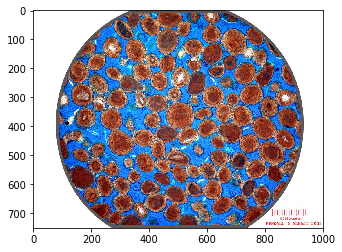

In [165]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
url= "http://www.sepmstrata.org/Images/_Gallery_Micro/Photos_Related/o-07-5x-01.jpg"
from io import BytesIO
response = requests.get(url)
img = np.asarray(Image.open(BytesIO(response.content)))
plt.imshow(img) 
plt.show()

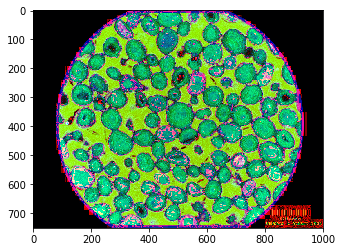

In [166]:
#convert from rgb to hsv
imgHSV=mpl.colors.rgb_to_hsv(img)
plt.imshow(imgHSV)
plt.show()

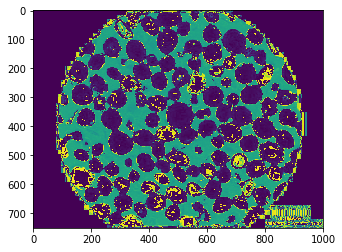

In [167]:
#extract hue
# see https://github.com/scivision/pyimagevideo/blob/master/RGB_BGR_GBR_conv.py
imgHue=imgHSV[:,:,0]
plt.imshow(imgHue)
plt.show()

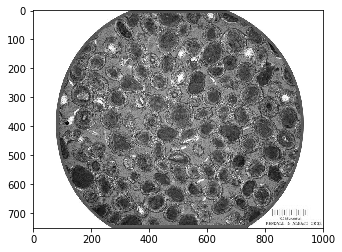

In [168]:
imgF=img.astype('float') # we will perform floating point arithmetic, so we must convert data to appropriate type
imgGray=(imgF[:,:,0]+imgF[:,:,1]+imgF[:,:,2])/3.
plt.imshow(imgGray, cmap='gray')
plt.show()


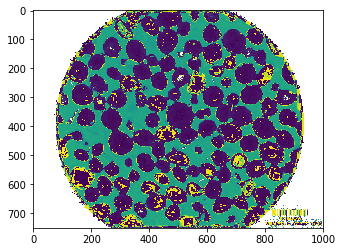

In [169]:
#we can use grayscale image as a mask
imgHueMasked=np.ma.masked_array(data = imgHue,
             mask = imgGray>250,
       fill_value = 999999)
plt.imshow(imgHueMasked)
plt.show()

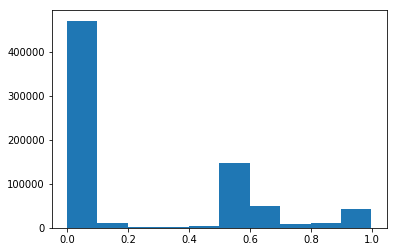

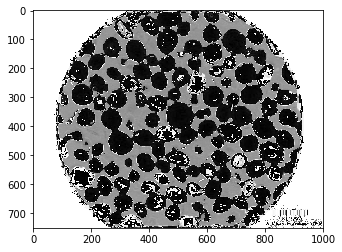

In [170]:
#Lets take a look at a histogram
mpl.pyplot.hist(imgHueMasked.flatten(), bins=10)
plt.show()
plt.imshow(imgHueMasked, cmap='gray')
plt.show()

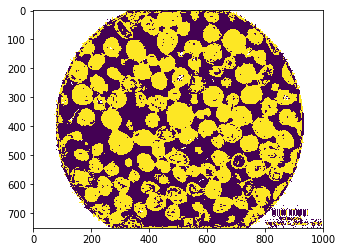

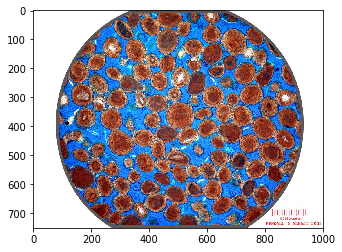

In [171]:
#Looks like all the oolites appear black on this image
#we can now separate the grains from the matrix by applying a threshold:
imgThresh=imgHueMasked<0.2 # if oolite -> 1, if matrix -> 0
plt.imshow(imgThresh)
plt.show()
plt.imshow(img) 
plt.show()

# See also:
# https://github.com/piratefsh/image-processing-101/blob/master/Image%20Processing%20101.ipynb

In [172]:
#Now we can compute the % of matrix/cement.
print('There are %s pixels in this image' % imgThresh.count())
#inline string substitution, the result is the same as in
#print('There are ', imgThresh.count(), ' pixels in this image')
print('of which %s are oolites.' %imgThresh.sum())
percentMatrix=((1-imgThresh.sum()/imgThresh.count())*100)
print('Which means %.2f%% matrix (or cement).' %percentMatrix)

There are 552717 pixels in this image
of which 293805 are oolites.
Which means 46.84% matrix (or cement).


**CAVEAT: this is not validated, it is just to show the potential use/approach**

One can attempt to count the number of oolites/particles: 


In [174]:
from scipy.ndimage import morphology
from skimage import morphology as mrph#, thin

import scipy

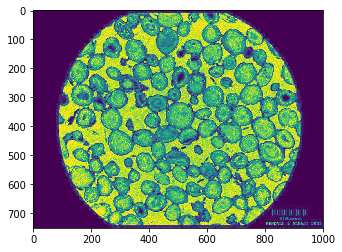

In [175]:
# We can first try to extract the grain boundary, and see if we get polyg
sat=imgHSV[:,:,1]
plt.imshow(sat)
plt.show()

In [176]:
# filtering

sobelH=np.asarray([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
sobelV=np.asarray([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

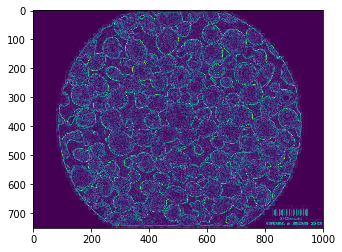

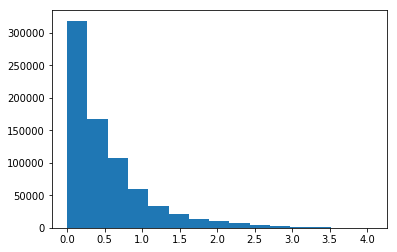

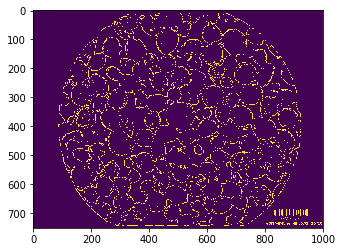

In [177]:
satConvH=scipy.ndimage.filters.convolve(sat,sobelH, mode='constant')
satConvV=scipy.ndimage.filters.convolve(sat,sobelV, mode='constant')
satEdge=np.sqrt(satConvH**2+satConvV**2)
plt.imshow(satEdge)
plt.show()
mpl.pyplot.hist(satEdge.flatten(), bins=15)
plt.show()
plt.imshow(satEdge>1.5)
plt.show()

In [178]:
# Define functions to do morphologic operations on binary arrays
imClose = lambda img, itr, rad: morphology.binary_closing(img, iterations=itr, structure=mrph.disk(radius=rad))
imOpen  = lambda img, itr, rad: morphology.binary_opening(img, iterations=itr, structure=mrph.disk(radius=rad))

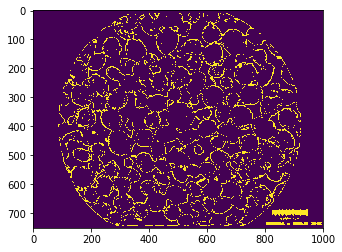

In [179]:
plt.imshow(imClose(satEdge>1.5,1,2))
plt.show()

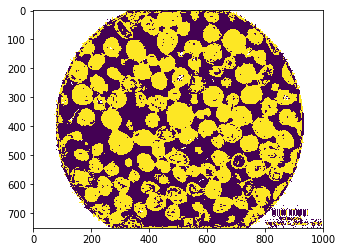

In [180]:
# Lets count the number of oolites:
plt.imshow(imgThresh)
plt.show()

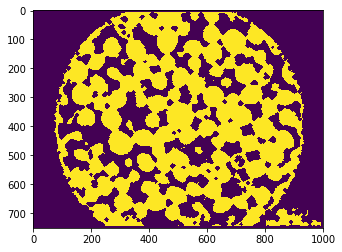

In [181]:


imgToErode=imgThresh.data*(1-imgThresh.mask)
imgThreshCosing=imClose(imgToErode,3,2)
plt.imshow(imgThreshCosing)
plt.show()

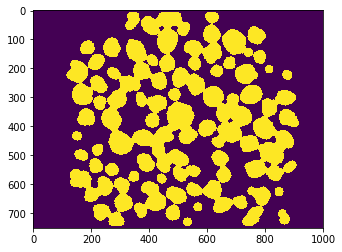

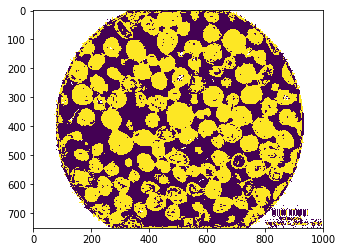

In [182]:
imgThreshCOpen=imOpen(imgThreshCosing,3,5)
plt.imshow(imgThreshCOpen)
plt.show()
plt.imshow(imgThresh) 
plt.show()

In [183]:
#from here on we can use segmentation by random walker
# https://www.scipy-lectures.org/packages/scikit-image/auto_examples/plot_segmentations.html
toSegment=imgThreshCOpen

In [184]:
import numpy as np
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage.segmentation import random_walker
import matplotlib.pyplot as plt
from scipy import ndimage

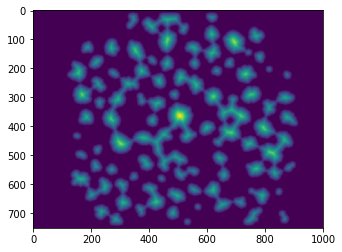

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [185]:
distance = ndimage.distance_transform_edt(toSegment)
#smooth it with convolution
distance=scipy.ndimage.filters.convolve(distance.astype('float'),np.ones((3,3)).astype('float')/9, mode='constant')
plt.imshow(distance)
plt.show()
distance

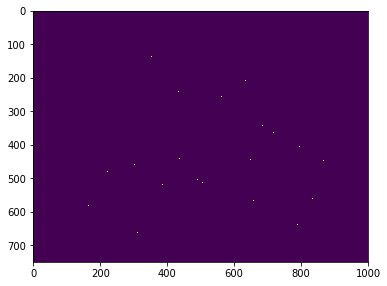

In [186]:
plt.figure(figsize=(6,6))
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)))#, labels=toSegment)
plt.imshow(local_maxi)
plt.show()

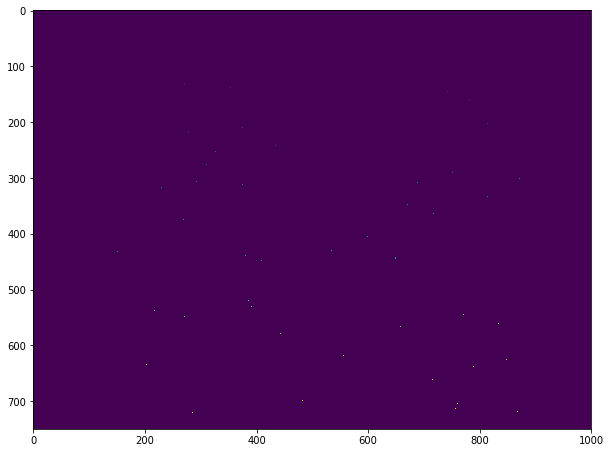

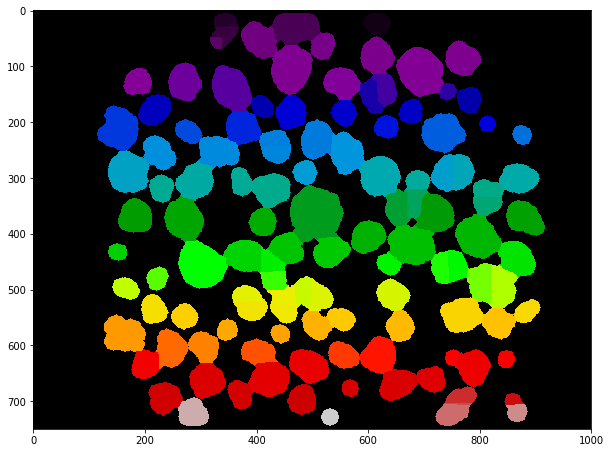

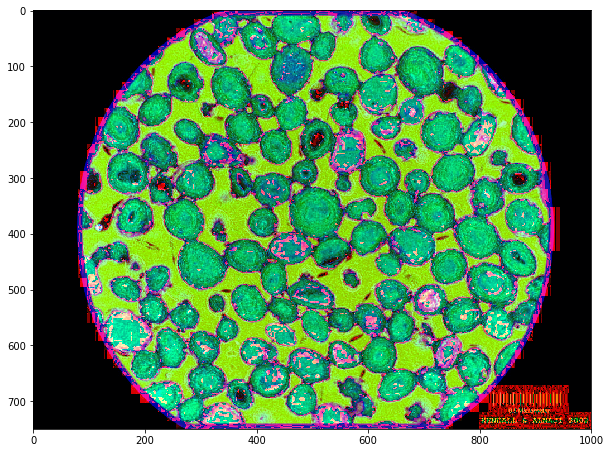

In [187]:
plt.figure(figsize=(10,10))
markers = measure.label(local_maxi)
plt.imshow(markers)
plt.show()
plt.figure(figsize=(10,10))
labels_ws = watershed(-distance, markers, mask=toSegment)
#plt.imshow(labels_ws)
plt.imshow(labels_ws, cmap='nipy_spectral', interpolation='nearest')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(imgHSV)
plt.show()

In [188]:
#we can find all the unique values on a segmented image
np.unique(labels_ws)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125])

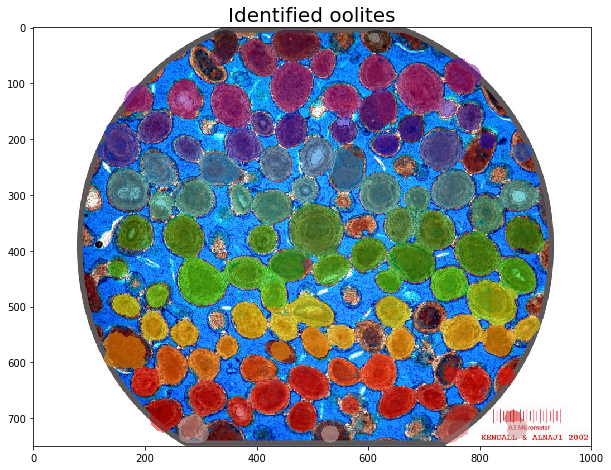

There is approximately 125 oolites on this image


In [189]:
#and count them:
plt.figure(figsize=(10,10))
plt.imshow(img) 
labels_ws_ma=np.ma.masked_array(labels_ws,1-imgThreshCOpen)
plt.imshow(labels_ws_ma, cmap='nipy_spectral', interpolation='nearest', alpha=0.5)
plt.title('Identified oolites', fontsize=20)
plt.show()
print('There is approximately %s oolites on this image' % str(len(np.unique(labels_ws))-1))


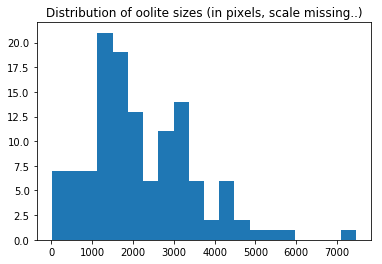

In [190]:
# We can even count their size and build a histogram to look at the distribution:
relativeSizes=[(labels_ws==i).sum() for i in np.unique(labels_ws)[1:]]
mpl.pyplot.hist(relativeSizes, bins=20)
plt.title('Distribution of oolite sizes (in pixels, scale missing..)')
plt.show()
#np.unique(labels_ws)


# Tasks

## T6.4

please try to use any other thin section from ```data_samples``` or the links above and experietn with the code above. Please report on challenges and difficulties, indicating what might be the cause.

# 2:D Ternary plots

from https://github.com/marcharper/python-ternary

e.g. https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb

## example: plotting clasti sediment composition


we would have a diagram looking like that. We can create the diagram itself and populate it with data

<img src="./images/ternary-clastic.jpg" width="300px">

In [59]:
%matplotlib inline

import ternary

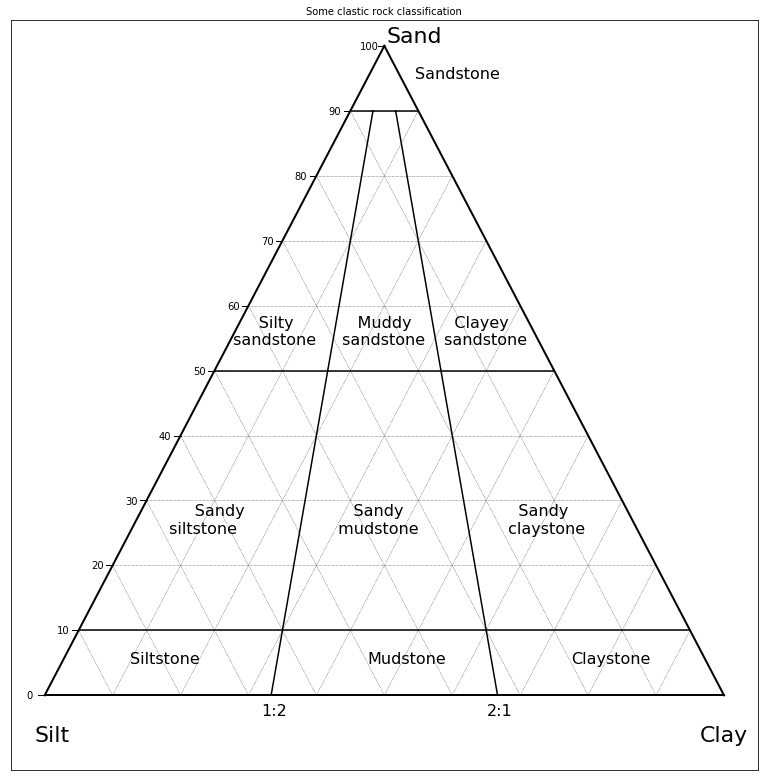

In [106]:
# Boundary and Gridlines
figure, tax = ternary.figure(scale=100)

figure.set_figheight(11)
figure.set_figwidth(11)

figure.tight_layout(h_pad=200,w_pad=20)

fontsize=10
# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color="black", multiple=10, linewidth=0.5)

# Set Axis labels and Title
tax.set_title("Some clastic rock classification", fontsize=fontsize)

#Label principal components
tax.annotate("Sand",position=(0,100.5,120),fontsize=22)
tax.annotate("Silt",position=(2,-7,110),fontsize=22)
tax.annotate("Clay",position=(100,-7,110),fontsize=22)

# Set ticks
tax.ticks(axis='l', linewidth=1, multiple=10,clockwise=True)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

# Draw horizontal lines
tax.horizontal_line(90, color='black')
tax.horizontal_line(50, color='black')
tax.horizontal_line(10, color='black')

# Draw vertical lines
tax.line((10/3,90,20/3), (100/3,0,200/3), color='black')
tax.annotate("1:2", position=((100/3,-3,200/3)), fontsize=16)
tax.line((20/3,90,10/3), (200/3,0,100/3), color='black')
tax.annotate("2:1", position=((200/3,-3,100/3)), fontsize=16)

# Annotate regions
tax.annotate("Sandstone",position=(7,95,5),fontsize=16)
tax.annotate("      Silty\n sandstone",position=(0,54,),fontsize=16)
tax.annotate("    Muddy\n sandstone",position=(16,54,),fontsize=16)
tax.annotate("   Clayey\n sandstone",position=(31,54,),fontsize=16)

tax.annotate("      Sandy\n siltstone",position=(5,25,),fontsize=16)
tax.annotate("    Sandy\n mudstone",position=(30,25,),fontsize=16)
tax.annotate("   Sandy\n claystone",position=(55,25,),fontsize=16)

tax.annotate("Siltstone",position=(10,5,),fontsize=16)
tax.annotate("Mudstone",position=(45,5,),fontsize=16)
tax.annotate("Claystone",position=(75,5,),fontsize=16)

ternary.plt.show()

In [157]:
# generate some random composition

n=3 # number of points

clay = np.random.uniform(0, 80,size=n) # generate random 1st variable
sand = np.random.uniform(0, 20,size=n)
silt = 100 - clay - sand

# print(clay)
# print (sand)
# print(silt)

print(clay+sand+silt)

composition = []
for k in range(0,n):
    print(clay[k])
    print(silt[k])
    print(sand[k])
    composition.append ((clay[k], sand[k], silt[k]))
print(composition[0]) 


composition = [
[52.06362651, 10.83615119, 37.1002223],
[62.36913306, 18.31673522, 19.31413172],
[10.5, 40.3, 49.1],
]


"""# TESTS 
composition = [
[0, 0, 100]    # all Silt
]

composition = [
[100, 0, 0]    # all clay
]

composition = [
[0, 100, 0]    # all sand
]
"""

[100. 100. 100.]
60.959915683249264
35.671549865947355
3.368534450803382
58.59197481206024
36.17044665859172
5.237578529348033
53.430202208940855
43.63221304492721
2.9375847461319293
(60.959915683249264, 3.368534450803382, 35.671549865947355)


'# TESTS \ncomposition = [\n[0, 0, 100]    # all Silt\n]\n\ncomposition = [\n[100, 0, 0]    # all clay\n]\n\ncomposition = [\n[0, 100, 0]    # all sand\n]\n'

# Tasks

## T6.5

Please consider the following composition of rocks (respectively clay, sand, silt, in order)

```
composition = [
[52.06362651, 10.83615119, 37.1002223],
[62.36913306, 18.31673522, 19.31413172],
[10.5, 40.3, 49.1],
]
``` 


please plot it on the graph above as scatter plot (see example notebook above)

Which clastic rock names are represented?


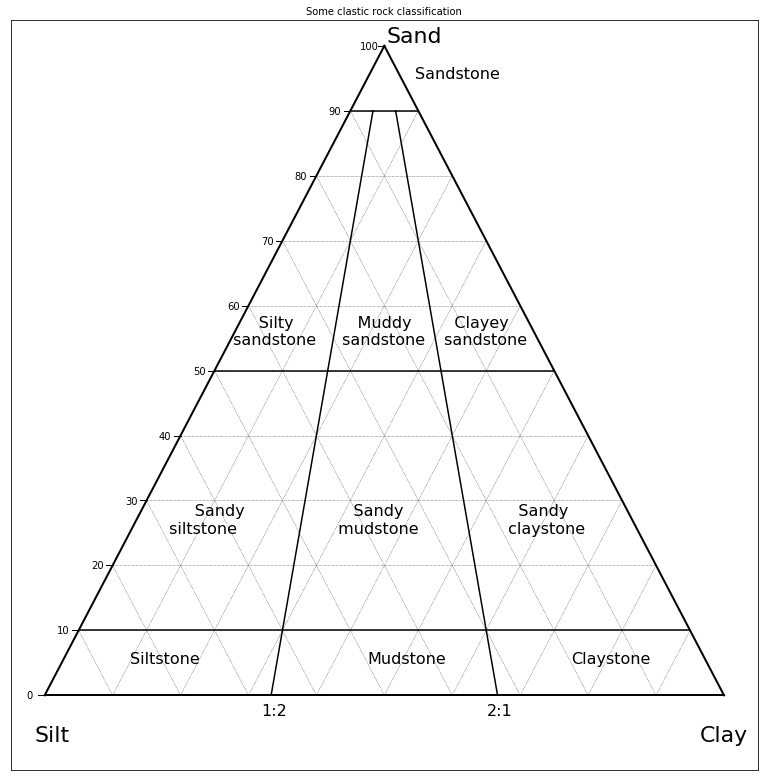

In [199]:
# Boundary and Gridlines
figure, tax = ternary.figure(scale=100)


figure.set_figheight(11)
figure.set_figwidth(11)

figure.tight_layout(h_pad=200,w_pad=20)

fontsize=10
# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color="black", multiple=10, linewidth=0.5)

# Set Axis labels and Title
tax.set_title("Some clastic rock classification", fontsize=fontsize)

#Label principal components
tax.annotate("Sand",position=(0,100.5,120),fontsize=22)
tax.annotate("Silt",position=(2,-7,110),fontsize=22)
tax.annotate("Clay",position=(100,-7,110),fontsize=22)

# Set ticks
tax.ticks(axis='l', linewidth=1, multiple=10,clockwise=True)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

# Draw horizontal lines
tax.horizontal_line(90, color='black')
tax.horizontal_line(50, color='black')
tax.horizontal_line(10, color='black')

# Draw vertical lines
tax.line((10/3,90,20/3), (100/3,0,200/3), color='black')
tax.annotate("1:2", position=((100/3,-3,200/3)), fontsize=16)
tax.line((20/3,90,10/3), (200/3,0,100/3), color='black')
tax.annotate("2:1", position=((200/3,-3,100/3)), fontsize=16)

# Annotate regions
tax.annotate("Sandstone",position=(7,95,5),fontsize=16)
tax.annotate("      Silty\n sandstone",position=(0,54,),fontsize=16)
tax.annotate("    Muddy\n sandstone",position=(16,54,),fontsize=16)
tax.annotate("   Clayey\n sandstone",position=(31,54,),fontsize=16)

tax.annotate("      Sandy\n siltstone",position=(5,25,),fontsize=16)
tax.annotate("    Sandy\n mudstone",position=(30,25,),fontsize=16)
tax.annotate("   Sandy\n claystone",position=(55,25,),fontsize=16)

tax.annotate("Siltstone",position=(10,5,),fontsize=16)
tax.annotate("Mudstone",position=(45,5,),fontsize=16)
tax.annotate("Claystone",position=(75,5,),fontsize=16)

# add scatter plot
### MISSING BITS - PLEASE FILL IN CHECK EXAMPLES

ternary.plt.show()

## T 6.6

Please try and reproduce the drawing below and populate it with teh foollowing composition, respectively for Hornblende, Olivine, Pyroxene:


```
# 


composition = [
[30, 50, 10],
[22, 34, 44],
[65, 25, 10],
]
```

<img src="./images/ternary-igneous.jpg" width="300px">


## Other geologically useful plots, e.g. TAS

see https://bitbucket.org/jsteven5/tasplot


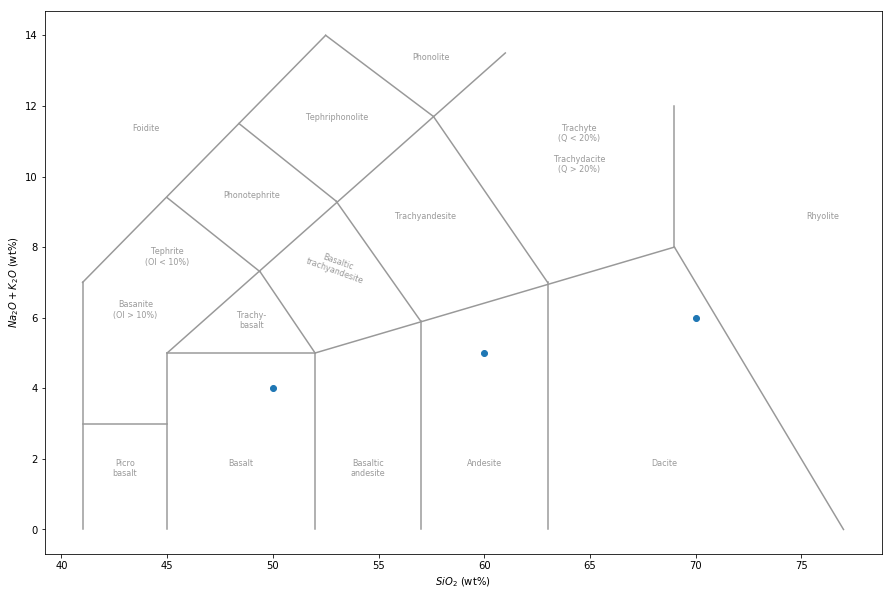

In [201]:
import tasplot
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
silica = [50, 60, 70]
total_alkalis = [4, 5, 6]

ax1 = plt.subplot(111)
tasplot.add_LeMaitre_fields(ax1)
# xlabel
plt.xlabel("$SiO{_2}$ (wt%)")
# ylabel
plt.ylabel("$Na{_2}O + K{_2}O$ (wt%)")

plt.plot(silica, total_alkalis, 'o')
plt.show()

# 3-D: Directional (structural) data

see Class04,  from http://geologyandpython.com/structural_geology.html

Rose diagrams are basically directional histograms. They are useful in a variety of geological applications.

One can also use GUI software packages for the purpose, e.g. [Stereonet - by R. W. Allmendinger](http://www.geo.cornell.edu/geology/faculty/RWA/programs/stereonet.html)

In [281]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt

%matplotlib inline

In [282]:
strikes = np.concatenate([np.random.randint(0, 360, 60),
                          np.random.randint(10, 60, 20),
                          np.random.randint(190, 300, 20),
                          np.random.randint(60, 90, 20),
                         ])

dips = np.concatenate([np.random.randint(0, 90, 60),
                       np.random.randint(60, 90, 60),
                         ])

In [283]:
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)

In [284]:
number_of_strikes[0] += number_of_strikes[-1]

In [285]:
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

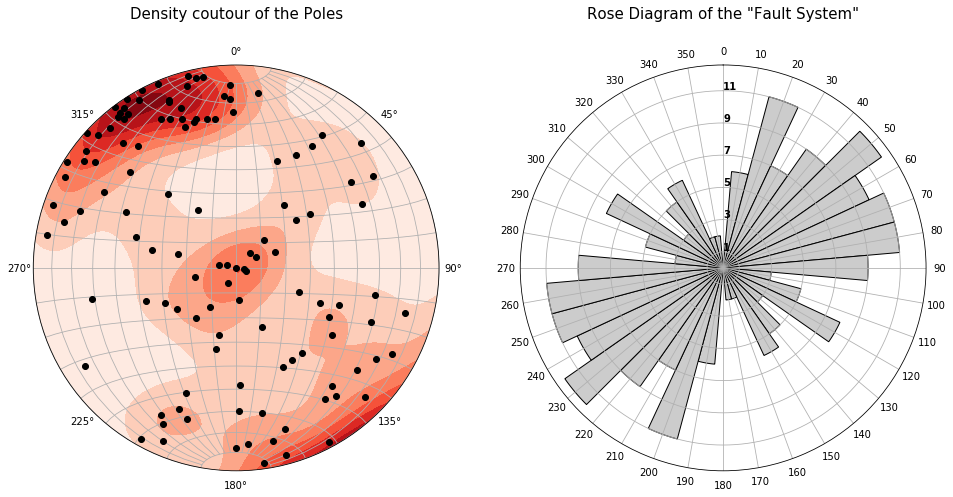

In [286]:
fig = plt.figure(figsize=(16,8))

# stereonet
ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

# rose diagram
ax = fig.add_subplot(122, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)
plt.show()
#fig.tight_layout()

# Tasks

## T6.7 - rose diagram

please use the following values of directions to plot a rose diagram (Example above, see URL).

```
strikes = [78, 80, 120, 91, 10, 343, 110, 43, 36, 12 , 45, 78, 30, 32, 33, 35, 45, 43, 67, 85, 43, 98, 50, 162]
```

comment on the most represented azimuth

example below:

Calculate the number of directions (strikes) every 10° using numpy.histogram.

In [14]:
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)
print(number_of_strikes)

[0 2 0 3 5 3 0 1 3 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


Sum the first half 0-180° with the second half 180-360° to achieve the "mirrored behavior" of Rose Diagrams.

In [15]:
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

print(half)
print(two_halves)

[0 2 0 3 5 3 0 1 3 2 1 1 1 0 0 0 2 0]
[0 2 0 3 5 3 0 1 3 2 1 1 1 0 0 0 2 0 0 2 0 3 5 3 0 1 3 2 1 1 1 0 0 0 2 0]


In [ ]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12,10))
rose = fig.add_subplot(111, projection='polar')

rose.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
rose.set_theta_zero_location('N')
rose.set_theta_direction(-1)
rose.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
rose.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
rose.set_title('Rose Diagram of measured strikes', y=1.10, fontsize=15)
plt.show()
